# Loan Default Prediction Using Machine Learning
---

## About Dataset

#### Problem Statement:
    
    This project focuses on building a machine learning model to predict whether a loan applicant will default or 
    successfully repay their loan. Using a dataset of 45,000 loan records, we explore personal demographics, financial status, 
    credit history, and loan details to develop a classification model for risk prediction.

#### Objective

    To analyze borrower characteristics and train a predictive model that can assess the likelihood of a loan default, 
    helping lenders make data-driven credit decisions.

#### Dataset Content
     The dataset includes 14 columns representing different factors influencing loan approvals and defaults:
- Total Records: 45,000
- Target Variable:`loan_status` (1 = Repaid, 0 = Defaulted)
- Features: Age, gender, education, income, employment experience, home ownership, loan amount, interest rate, credit score, etc.

#### Personal Information
- person_age: Age of the applicant (in years).
- person_gender: Gender of the applicant (male, female).
- person_education: Educational background (High School, Bachelor, Master, etc.).
- person_income: Annual income of the applicant (in USD).
- person_emp_exp: Years of employment experience.
- person_home_ownership: Type of home ownership (RENT, OWN, MORTGAGE).

#### Loan Details
- loan_amnt: Loan amount requested (in USD).
- loan_intent: Purpose of the loan (PERSONAL, EDUCATION, MEDICAL, etc.).
- loan_int_rate: Interest rate on the loan (percentage).
- loan_percent_income: Ratio of loan amount to income.

#### Credit & Loan History
- cb_person_cred_hist_length: Length of the applicant's credit history (in years).
- credit_score: Credit score of the applicant.
- previous_loan_defaults_on_file: Whether the applicant has previous loan defaults (Yes or No).

#### Target Variabl
- loan_status: 1 if the loan was repaid successfully, 0 if the applicant defaulted.

#### Use Cases
- Loan Default Prediction: Build a classification model to predict loan repayment.
- Credit Risk Analysis: Analyze the relationship between income, credit score, and loan defaults.
- Feature Engineering: Extract new insights from employment history, home ownership, and loan amounts.

#### Techniques Used

- Data Cleaning & Preprocessing
- Label Encoding & One-Hot Encoding
- Exploratory Data Analysis (EDA)
- Classification Models: Logistic Regression, Random Forest, XGBoost, Gradient Boosting, etc.
- Model Evaluation using Accuracy, Precision, Recall, F1 Score, ROC-AUC, Average Precision

#### Acknowledgments
This dataset is synthetic and designed for machine learning and financial risk analysis.


## Outcome

A machine learning pipeline capable of predicting loan defaults, useful for credit risk assessment in financial institutions.



## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

1. Since data is in form of csv file we have to use pandas read_csv to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()    # give the 1st five rows of the df.

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


#### Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [3]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

#### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [4]:
df.shape

(45000, 14)

In [5]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 45000
Number of Columns 14


In [6]:
df.describe()  # Checking the summary for numerical columns

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Data Cleaning and Preprocessing

In [7]:
df.describe()  # Checking the summary for numerical columns

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [8]:
# Checking for missing values and duplicates
print('Missing values in each column:')
print(df.isnull().sum())

print()

# If there are duplicates, we remove them
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print('Duplicates dropped.')

print()

# Convert columns to appropriate types if needed (the file description already indicates types)
print('\nData types after cleaning:')
print(df.dtypes)

Missing values in each column:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64



Data types after cleaning:
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb

## Visualize Target Variable

In [9]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

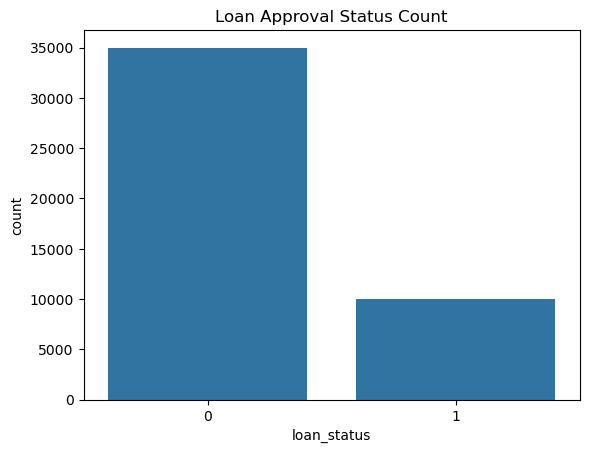

In [10]:
sns.countplot(data=df, x='loan_status')
plt.title('Loan Approval Status Count')
plt.show()

In [11]:
# We separate Categorical and Numerical columns
categorical = []
numerical= []
for i in df.columns:
    if df[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)

In [12]:
categorical

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [13]:
numerical

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

## Exploratory Data Analysis

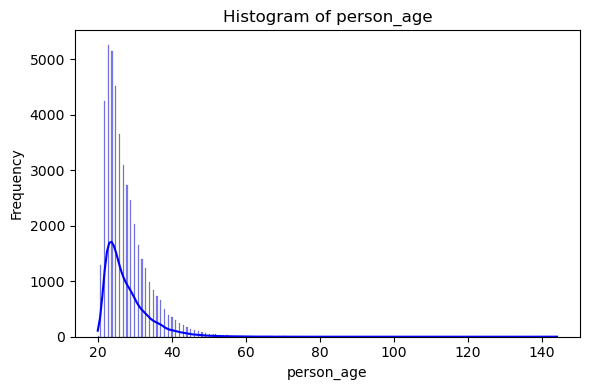

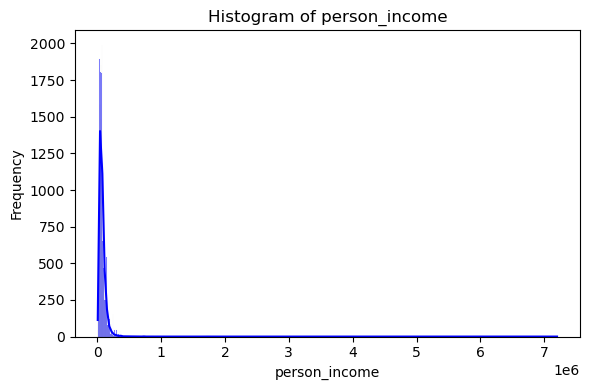

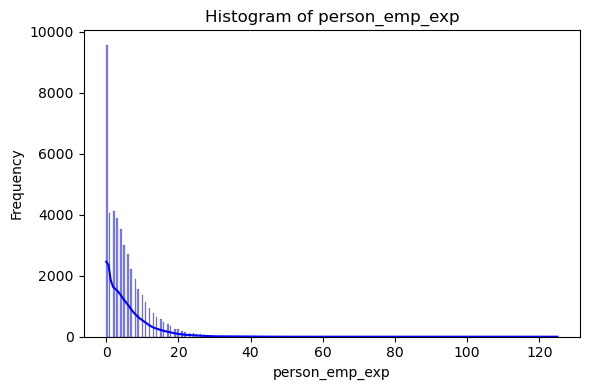

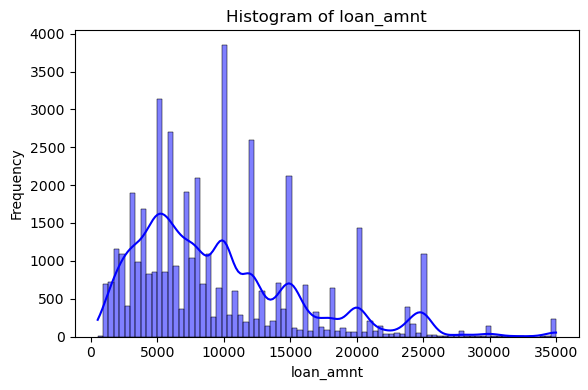

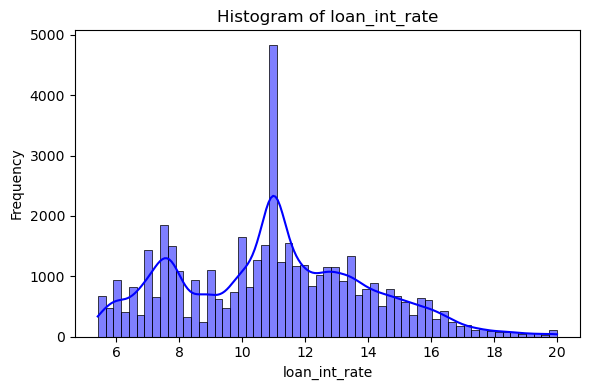

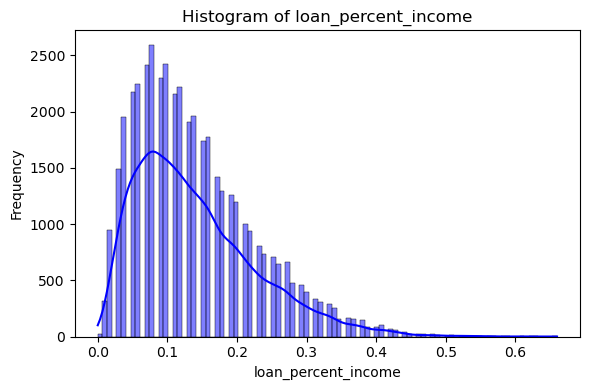

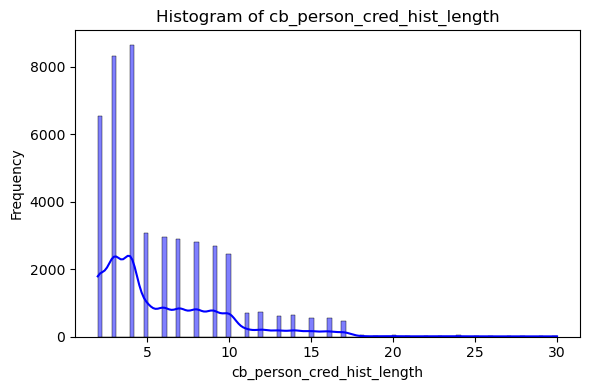

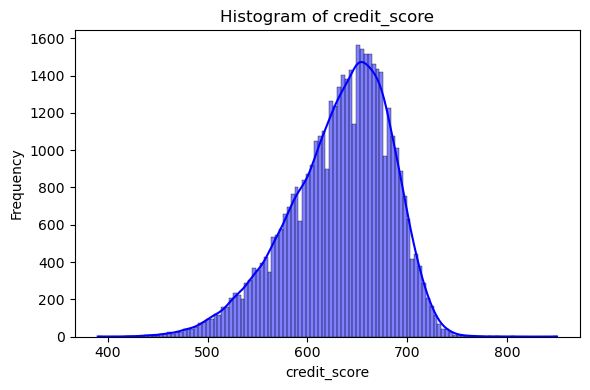

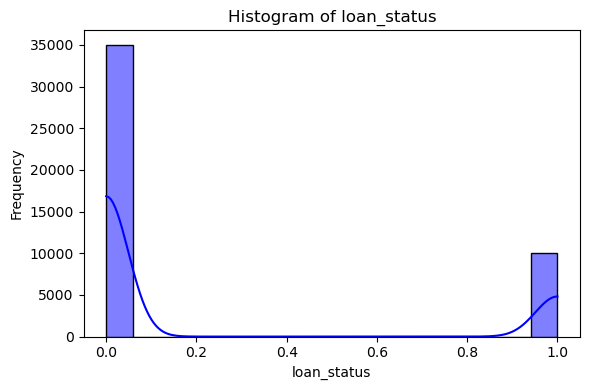

In [14]:
# Plotting histograms for numeric columns
numerical = df.select_dtypes(include=[np.number]).columns.tolist()

for i in numerical:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[i], kde=True, color='blue')
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

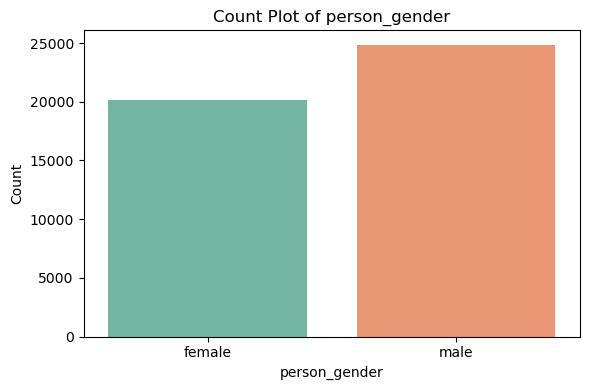

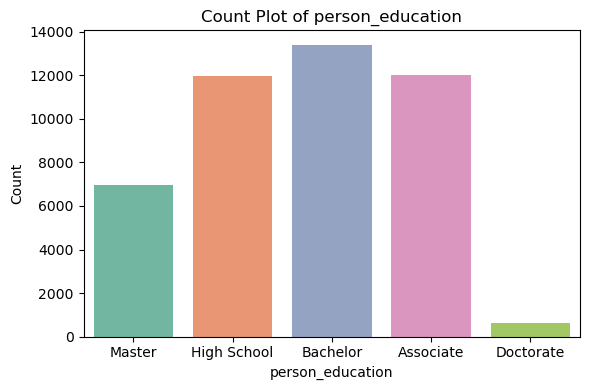

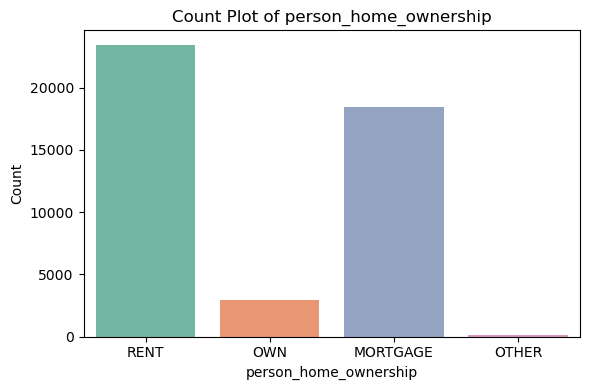

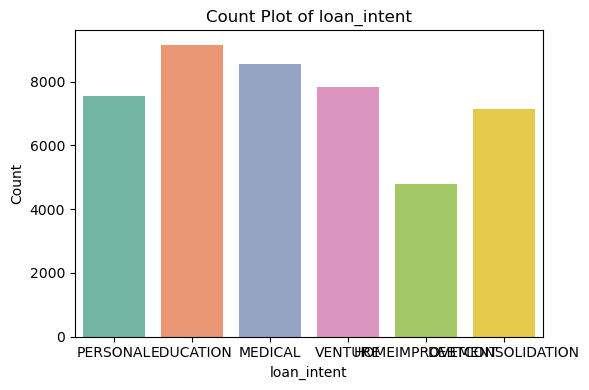

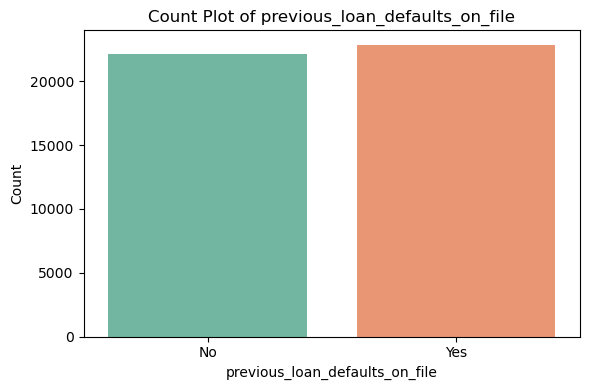

In [15]:
# Plotting count plots for key categorical columns
for i in ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=i, palette='Set2')
    plt.title(f'Count Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

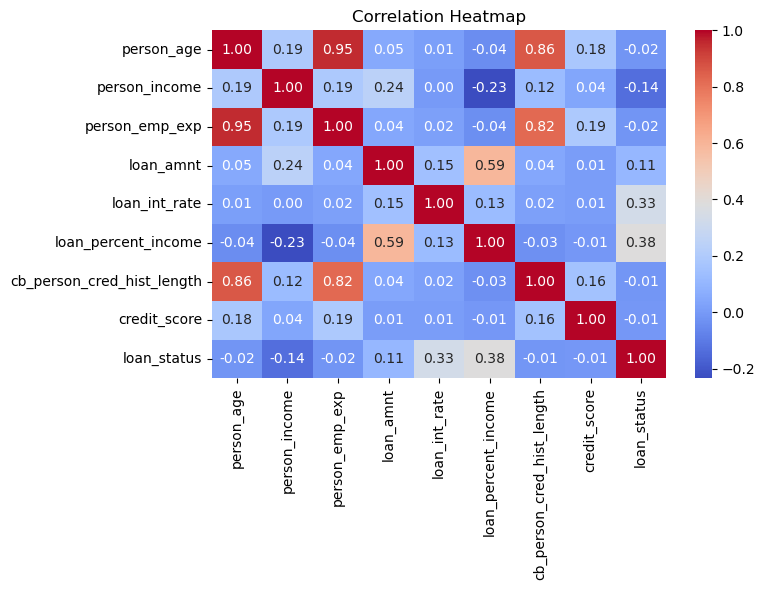

In [16]:
# Correlation heatmap if there are 4 or more numeric columns
if len(numerical) >= 4:
    plt.figure(figsize=(8, 6))
    numerical_df = df.select_dtypes(include=[np.number])
    corr = numerical_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

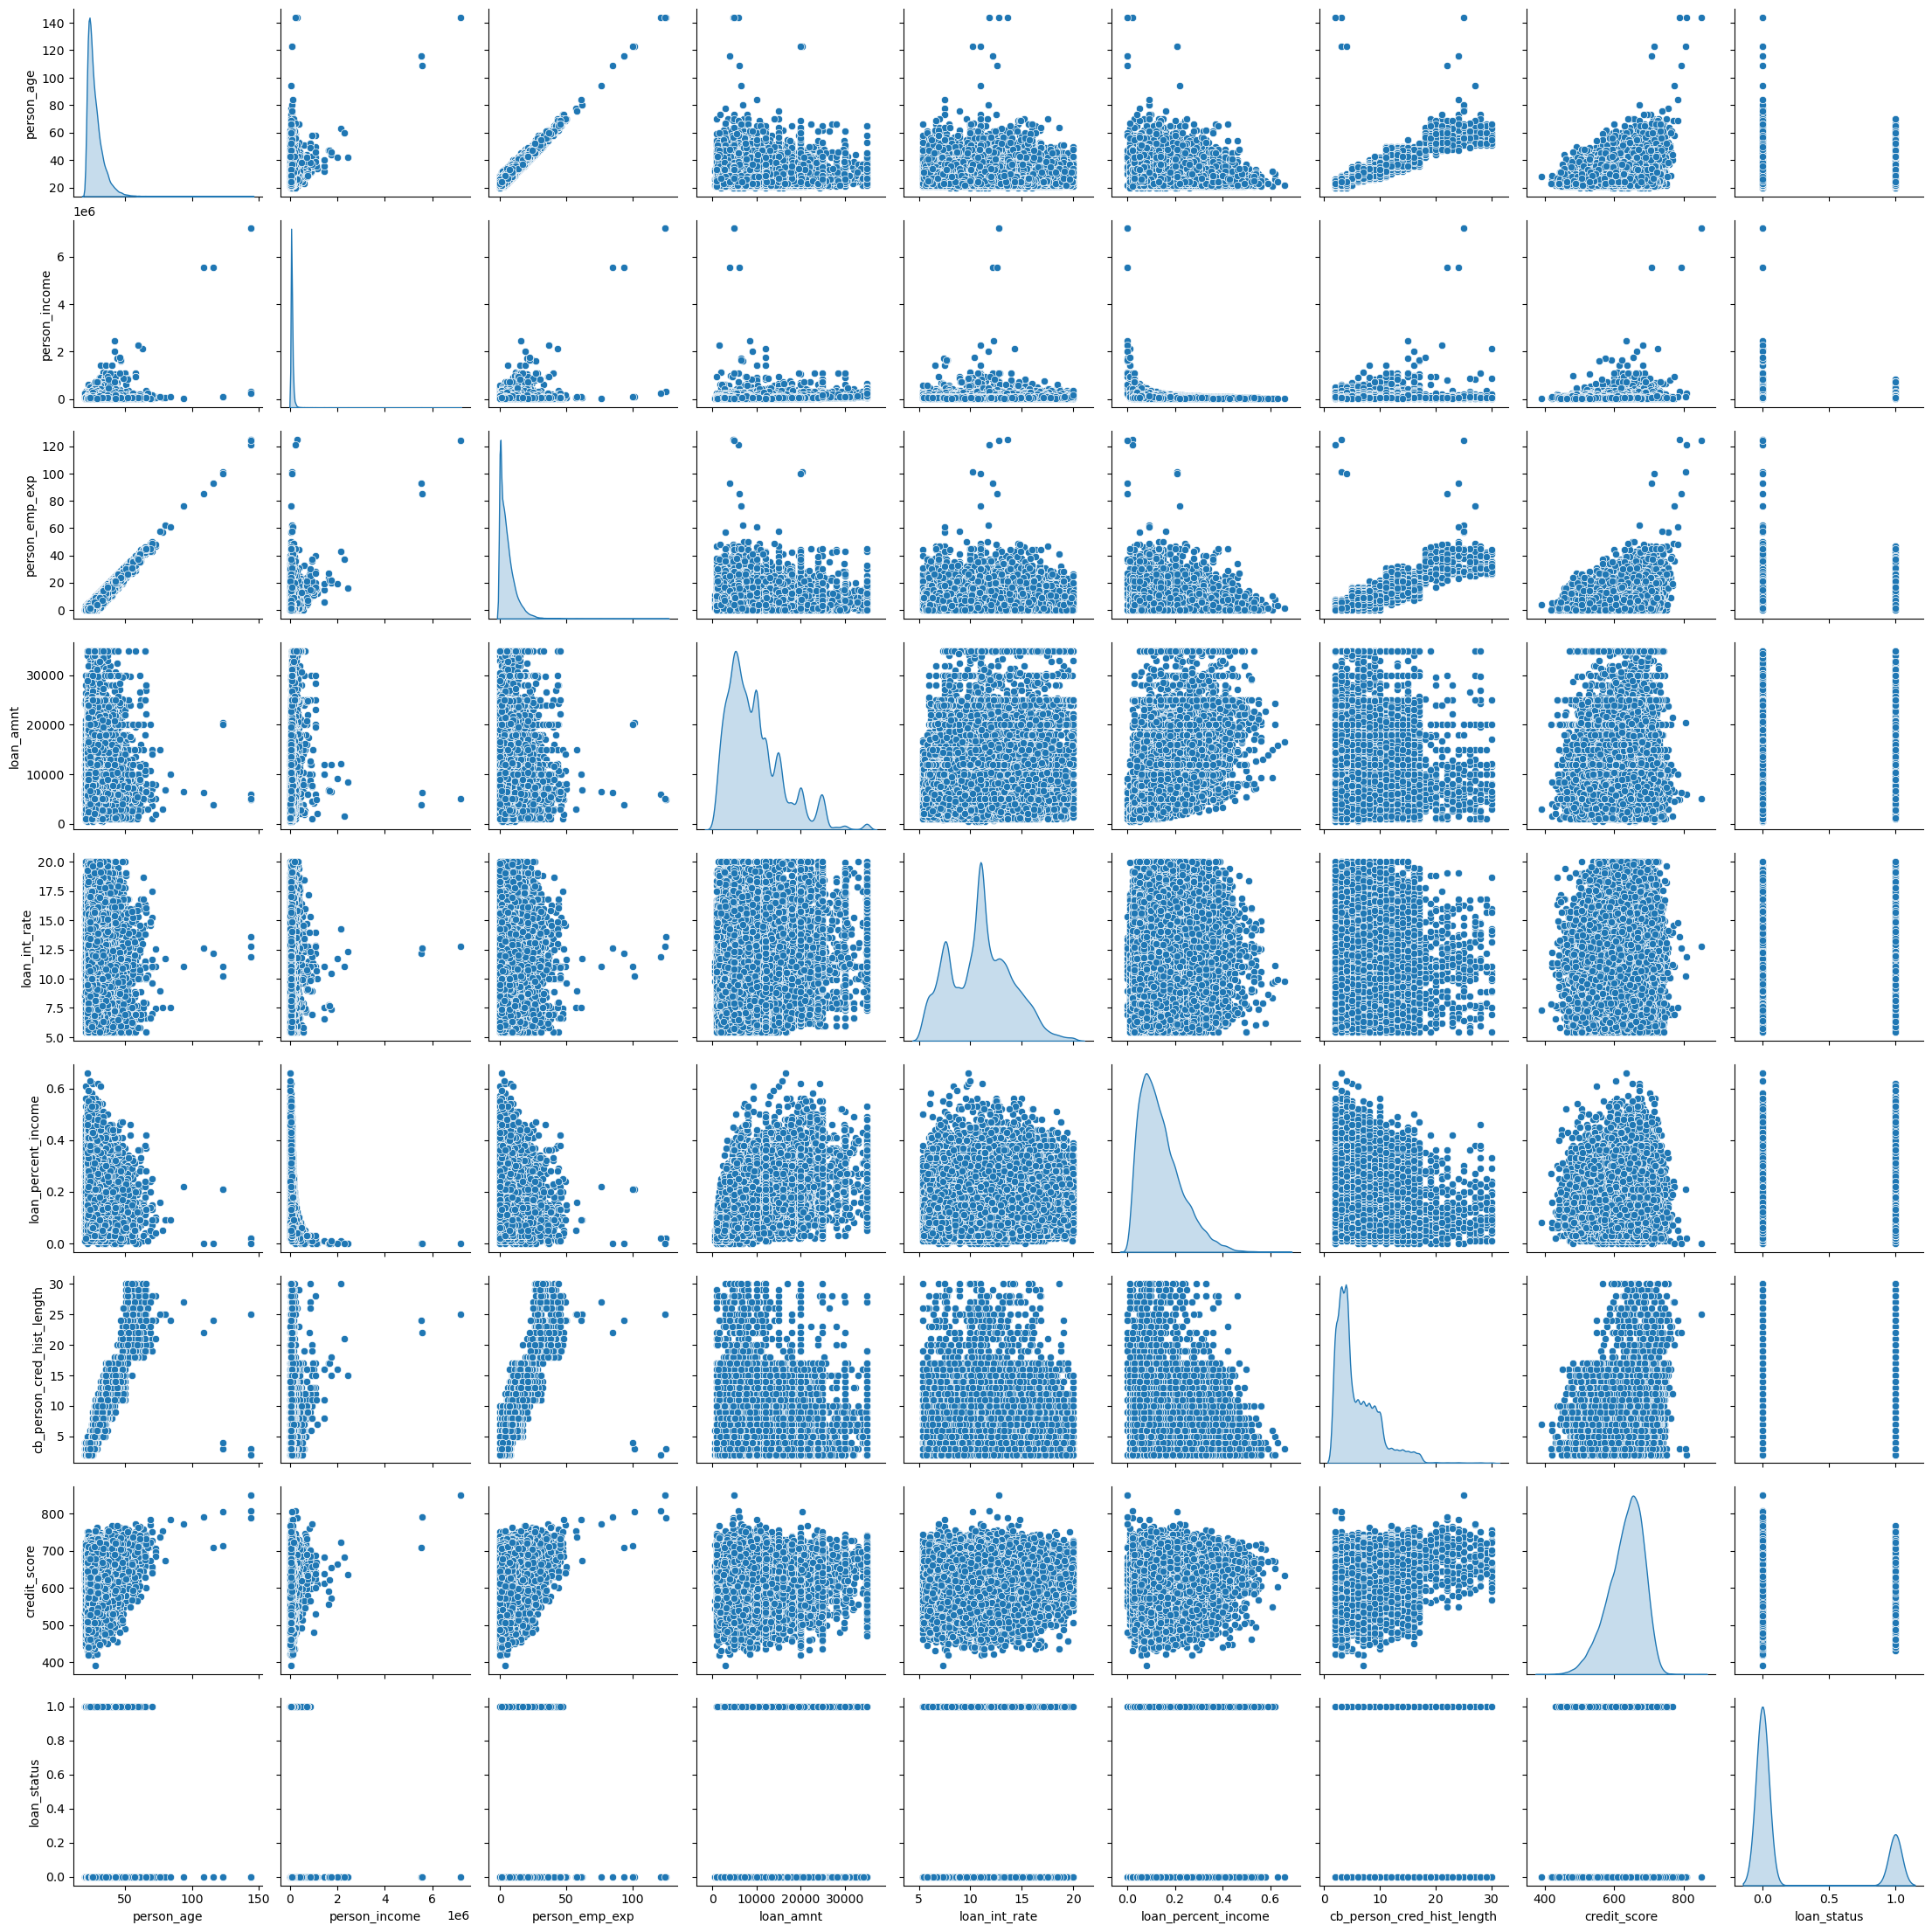

In [17]:
# Pair plot to observe relationships among numeric features
sns.pairplot(df[numerical], diag_kind='kde')
plt.show()

In [18]:
# Checking unique values for categorical columns to ensure proper data types
categorical = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
for i in categorical:
    print(f"Unique values in {i}: {df[i].unique()}")

Unique values in person_gender: ['female' 'male']
Unique values in person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Unique values in person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values in loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Unique values in previous_loan_defaults_on_file: ['No' 'Yes']


## Feature Engineering

### Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [19]:
df[categorical]

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


###  Label Encoding (Used for binary categorical columns)

- As this is case of Ordinal Categorical type we perform LabelEncoder
- Here Values are assigned with corresponding keys

In [20]:
df['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [21]:
df['person_gender'].replace(to_replace= ["male", "female"], 
                              value= [1, 0], inplace = True)

In [22]:
df['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

In [23]:
df['previous_loan_defaults_on_file'].replace({"Yes": 1, "No": 0}, inplace = True)

In [24]:
categorical = []
numerical= []
for i in df.columns:
    if df[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)

In [25]:
df[categorical]

,person_education,person_home_ownership,loan_intent
0,Master,RENT,PERSONAL
1,High School,OWN,EDUCATION
2,High School,MORTGAGE,MEDICAL
3,Bachelor,RENT,MEDICAL
4,Master,RENT,MEDICAL
...,...,...,...
44995,Associate,RENT,MEDICAL
44996,Associate,RENT,HOMEIMPROVEMENT
44997,Associate,RENT,DEBTCONSOLIDATION
44998,Bachelor,RENT,EDUCATION


## One-Hot Encoding (Used for multi-class categorical columns)

In [26]:
df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [27]:
# As Person_education is Nominal Categorical data we will perform OneHotEncoding

person_education = df[["person_education"]]

person_education = pd.get_dummies(person_education, drop_first= True)

person_education.head()

#person_education.shape

,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,True,False,False,False
4,False,False,False,True


In [28]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [29]:
# As person_home_ownership is Nominal Categorical data we will perform OneHotEncoding
person_home_ownership = df[["person_home_ownership"]]

person_home_ownership = pd.get_dummies(person_home_ownership, drop_first= True)

person_home_ownership.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,False,False,True
1,False,True,False
2,False,False,False
3,False,False,True
4,False,False,True


In [30]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [31]:
# As loan_intent is Nominal Categorical data we will perform OneHotEncoding
loan_intent = df[["loan_intent"]]

loan_intent = pd.get_dummies(loan_intent, drop_first= True)

loan_intent.head()

,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,False,False,False,True,False
1,True,False,False,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False


In [32]:
# Concatenate dataframe --> df + person_education + person_home_ownership + loan_intent

df_encoded = pd.concat([df, person_education, person_home_ownership, loan_intent], axis = 1)

df_encoded.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,...,False,True,False,False,True,False,False,False,True,False
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,...,True,False,False,True,False,True,False,False,False,False
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,...,True,False,False,False,False,False,False,True,False,False
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,...,False,False,False,False,True,False,False,True,False,False
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,...,False,True,False,False,True,False,False,True,False,False


In [33]:
df_encoded.drop(["person_education", "person_home_ownership", "loan_intent"], axis = 1, inplace = True)

df_encoded.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,False,True,False,False,True,False,False,False,True,False
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,True,False,False,True,False,True,False,False,False,False
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,True,False,False,False,False,False,False,True,False,False
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,False,False,False,False,True,False,False,True,False,False
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,False,True,False,False,True,False,False,True,False,False


In [34]:
# Verify the new data structure
print('Shape before encoding:', df.shape)
print('Shape after encoding:', df_encoded.shape)

Shape before encoding: (45000, 14)
Shape after encoding: (45000, 23)


In [35]:
df_encoded.shape

(45000, 23)

In [36]:
df_encoded.columns

Index(['person_age', 'person_gender', 'person_income', 'person_emp_exp',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [37]:
x = df_encoded.loc[:, ['person_age', 'person_gender', 'person_income', 'person_emp_exp',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE']]
x.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,False,True,False,False,True,False,False,False,True,False
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,True,False,False,True,False,True,False,False,False,False
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,True,False,False,False,False,False,False,True,False,False
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,False,False,False,False,True,False,False,True,False,False
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,False,True,False,False,True,False,False,True,False,False


In [38]:
y = df_encoded.iloc[:, 1]
y.head()

0    0
1    0
2    0
3    0
4    1
Name: person_gender, dtype: int64

## Model Building and Evaluation

#### Fitting Model: `Logistic Regression`
- Split the dataset into training and testing sets using `train_test_split`.
- Scaling of data:
    - Logistic Regression benefits from scaling, especially if the data has varying magnitudes.
    - Applied `StandardScaler`.
- Import model from `sklearn.linear_model`.
- Applied SMOTE to balance the training data.
- Fit the Logistic Regression model on resampled training data.
- Predict outcomes using `X_test`.

#### Evaluate model using:
- `Accuracy`, `Classification Report`, `Confusion Matrix`, `ROC-AUC Score`

#### Visualize:
- Confusion matrix heatmap
- ROC Curve
- Coefficient-based Feature Importance

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report, roc_auc_score

In [40]:
# Define features (X) and target (y)
# Here, we predict `loan_status` based on all other variables
X = df_encoded.drop(['loan_status'], axis=1)
y = df_encoded['loan_status']

In [41]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### SMOTE (Synthetic Minority Over-Sampling Technique)

In [42]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance (on training data only)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [43]:
from sklearn.preprocessing import StandardScaler

# Apply Standard Scaling (important for Logistic Regression)
scaler = StandardScaler()              # Logistic Regression is a distance-based algorithm (linear model), and it uses gradient descent 
                                      # for optimization. Features on larger scales can dominate the objective function and bias the model.
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression 

In [44]:
# Initialize and train Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_res_scaled, y_train_res)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Logistic Regression Accuracy: 0.8713333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      6990
           1       0.67      0.83      0.74      2010

    accuracy                           0.87      9000
   macro avg       0.81      0.86      0.83      9000
weighted avg       0.89      0.87      0.88      9000

ROC-AUC Score: 0.9428134719820069


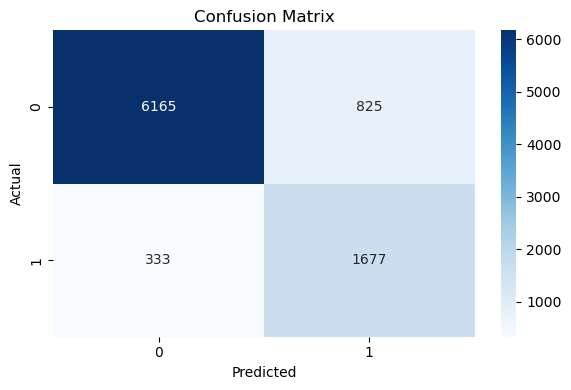

In [45]:
# Confusion Matrix (shows true vs. predicted labels)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

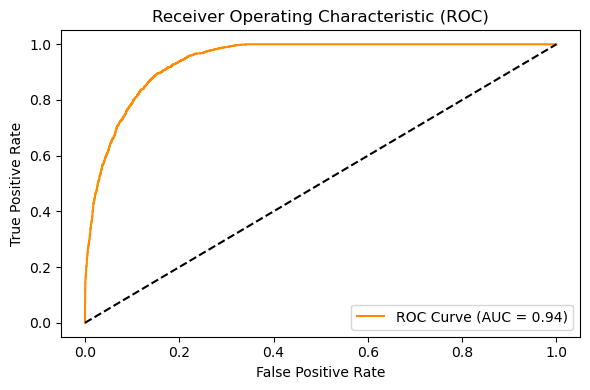

In [46]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

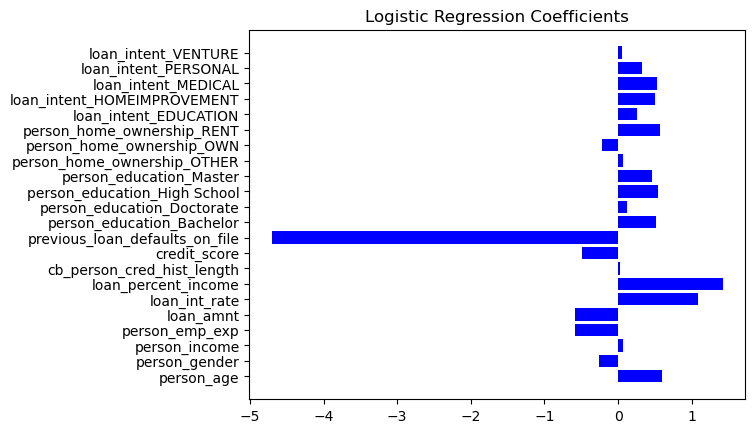

In [47]:
# Feature Importance PLot
importances = model.coef_[0]
plt.barh(X.columns, importances, color='blue')
plt.title('Logistic Regression Coefficients')
plt.show()

In [48]:
importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
})
importance['importance'] = importance['coefficient'].abs()
importance = importance.sort_values(by='importance', ascending=False)

print("Logistic Regression Feature Importance")
print(importance[['feature', 'importance']])

Logistic Regression Feature Importance
                           feature  importance
9   previous_loan_defaults_on_file    4.703642
6              loan_percent_income    1.420860
5                    loan_int_rate    1.079285
0                       person_age    0.597925
3                   person_emp_exp    0.588046
4                        loan_amnt    0.578743
16      person_home_ownership_RENT    0.568897
12    person_education_High School    0.543324
19             loan_intent_MEDICAL    0.523297
10       person_education_Bachelor    0.517971
18     loan_intent_HOMEIMPROVEMENT    0.504927
8                     credit_score    0.496219
13         person_education_Master    0.457350
20            loan_intent_PERSONAL    0.322488
17           loan_intent_EDUCATION    0.261751
1                    person_gender    0.258880
15       person_home_ownership_OWN    0.223759
11      person_education_Doctorate    0.126820
2                    person_income    0.069820
14     person_home_ow

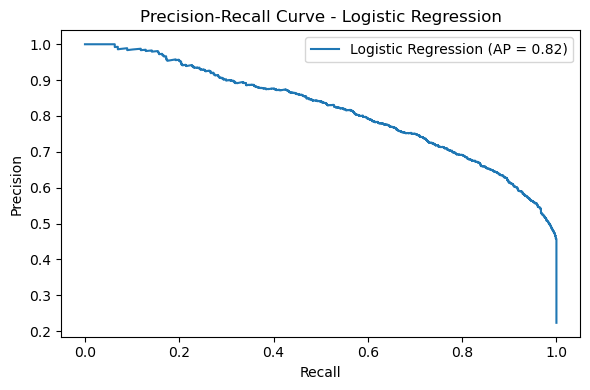

In [49]:
from sklearn.metrics import precision_recall_curve, average_precision_score
# Especially helpful for imbalanced data
# Use scaled predicted probabilities from the already fitted model
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='Logistic Regression (AP = {:.2f})'.format(average_precision_score(y_test, y_proba)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

#### Fitting Model: Random Forest (Classification)
- Split the dataset into training and testing sets using `train_test_split`.
- Scaling is NOT needed for Random Forest — it’s a tree-based model and handles raw features well.
- Import model from `sklearn.ensemble.RandomForestClassifier`.
- Applied SMOTE to balance training data.
- Fit the Random Forest model on resampled training data.
- Predict outcomes using `X_test`.

#### Evaluate model using:
   - `Accuracy`, `Classification Report`, `Confusion Matrix`, `ROC-AUC Score`

#### Visualize:
- Confusion matrix heatmap
- ROC Curve
- Feature Importance bar plot (`model.feature_importances_`)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [51]:
# Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))
print()

Random Forest Accuracy: 0.9144444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      6990
           1       0.79      0.84      0.81      2010

    accuracy                           0.91      9000
   macro avg       0.87      0.89      0.88      9000
weighted avg       0.92      0.91      0.92      9000

ROC-AUC Score: 0.9695148008170876



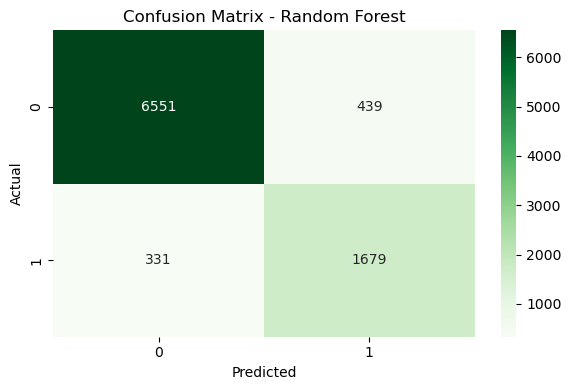

In [52]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

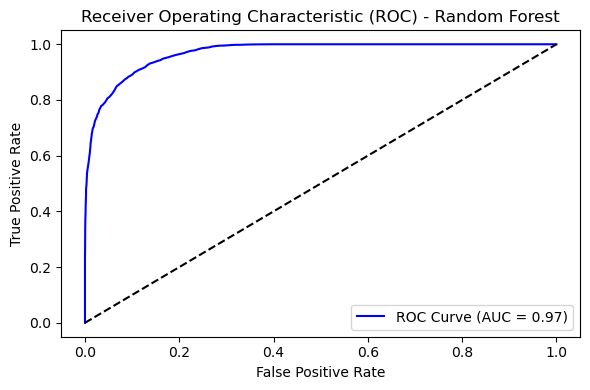

In [53]:
# Plot ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

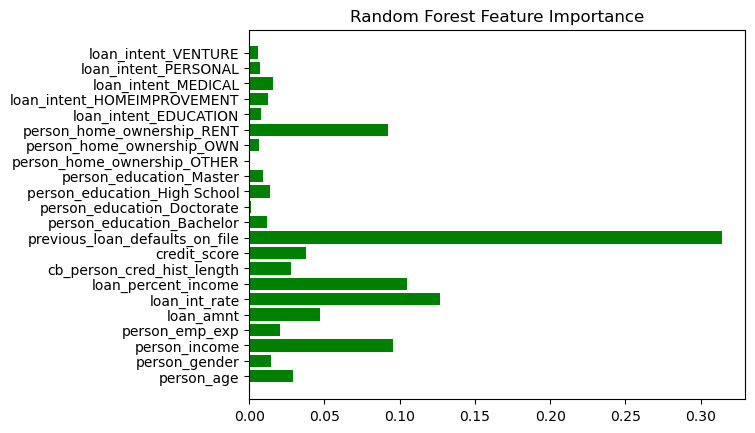

In [54]:
# Feature Importance Plot
importances = rf_model.feature_importances_
plt.barh(X.columns, importances, color='green')
plt.title('Random Forest Feature Importance')
plt.show()

In [55]:
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_                       
}).sort_values(by='importance', ascending=False)

print("Random Forest Feature Importance")
print(importance)

Random Forest Feature Importance
                           feature  importance
9   previous_loan_defaults_on_file    0.313874
5                    loan_int_rate    0.126934
6              loan_percent_income    0.104573
2                    person_income    0.095336
16      person_home_ownership_RENT    0.092133
4                        loan_amnt    0.047062
8                     credit_score    0.037422
0                       person_age    0.028821
7       cb_person_cred_hist_length    0.027599
3                   person_emp_exp    0.020345
19             loan_intent_MEDICAL    0.015781
1                    person_gender    0.014313
12    person_education_High School    0.013614
18     loan_intent_HOMEIMPROVEMENT    0.012702
10       person_education_Bachelor    0.011695
13         person_education_Master    0.009228
17           loan_intent_EDUCATION    0.007542
20            loan_intent_PERSONAL    0.007431
15       person_home_ownership_OWN    0.006509
21             loan_intent_

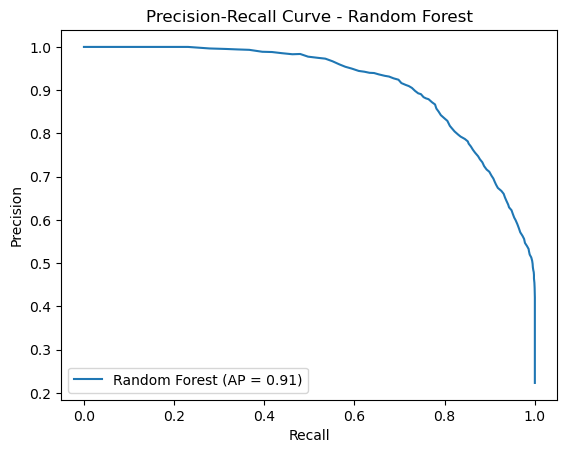

In [56]:
# Especially helpful for imbalanced data
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
plt.plot(recall_rf, precision_rf, label='Random Forest (AP = {:.2f})'.format(average_precision_score(y_test, y_proba_rf)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend()
plt.show()

## Train and Evaluate `XGBoost Classifier`

In [61]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 4.8 MB/s eta 0:00:32
    --------------------------------------- 2.1/150.0 MB 5.3 MB/s eta 0:00:28
    --------------------------------------- 3.4/150.0 MB 5.6 MB/s eta 0:00:27
   - -------------------------------------- 5.0/150.0 MB 6.2 MB/s eta 0:00:24
   - -------------------------------------- 6.3/150.0 MB 6.3 MB/s eta 0:00:23
   -- ------------------------------------- 7.9/150.0 MB 6.3 MB/s eta 0:00:23
   -- ------------------------------------- 8.9/150.0 MB 6.1 MB/s eta 0:00:24
   -- ------------------------------------- 10.5/150.0 MB 6.2 MB/s eta 0:00:23
   --- ------------------------------------ 11.8/150.0 MB 6.3 MB/s eta 0:00:23
   --- ------------------------------------ 13.1/150.0 MB 6.3 MB/s eta 0:00:22
   --- ------------------------------------ 14.9/150.0 MB 6.4 MB/s eta 0:00:21
   ---- ----------------------------------- 16.3/150.0 MB 6.5 MB/s 

In [62]:
from xgboost import XGBClassifier

XGBoost Accuracy: 0.9316666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      6990
           1       0.86      0.83      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000

ROC-AUC Score: 0.9765471640367547


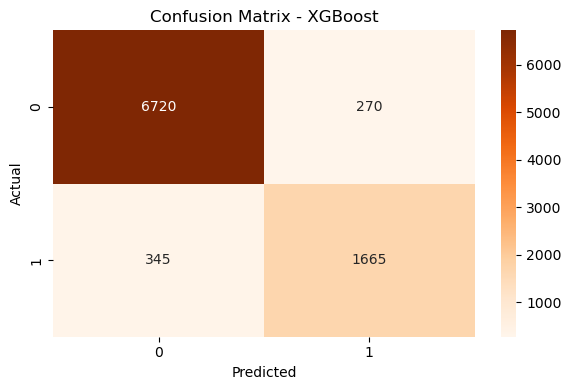

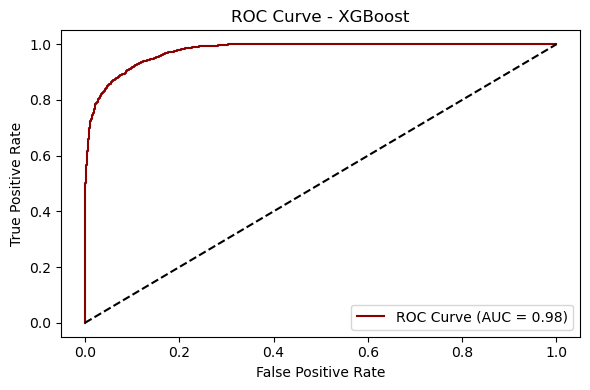

In [63]:
# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})', color='darkred')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

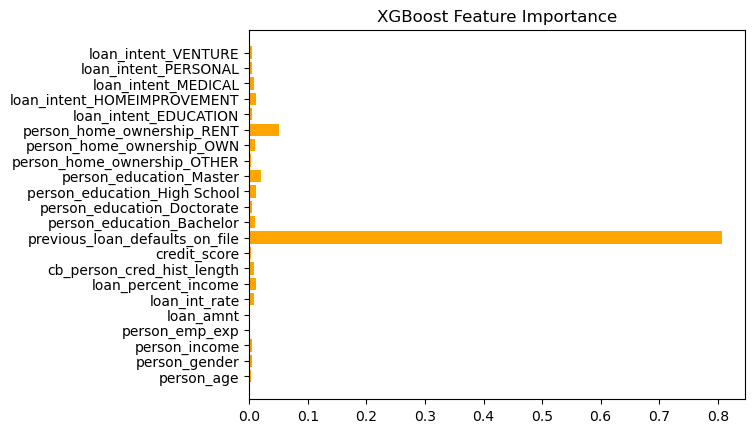

In [64]:
# Feature Importance Plot
importances = xgb_model.feature_importances_
plt.barh(X.columns, importances, color='orange')
plt.title('XGBoost Feature Importance')
plt.show()

In [65]:
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("XGBoost Feature Importance")
print(importance)

XGBoost Feature Importance
                           feature  importance
9   previous_loan_defaults_on_file    0.806519
16      person_home_ownership_RENT    0.050453
13         person_education_Master    0.019817
18     loan_intent_HOMEIMPROVEMENT    0.012348
12    person_education_High School    0.012248
6              loan_percent_income    0.011654
15       person_home_ownership_OWN    0.010363
10       person_education_Bachelor    0.010190
19             loan_intent_MEDICAL    0.008715
5                    loan_int_rate    0.008666
7       cb_person_cred_hist_length    0.008283
2                    person_income    0.005459
20            loan_intent_PERSONAL    0.005190
21             loan_intent_VENTURE    0.004985
17           loan_intent_EDUCATION    0.004769
1                    person_gender    0.004721
11      person_education_Doctorate    0.004218
0                       person_age    0.003744
8                     credit_score    0.002392
14     person_home_ownership_OTHE

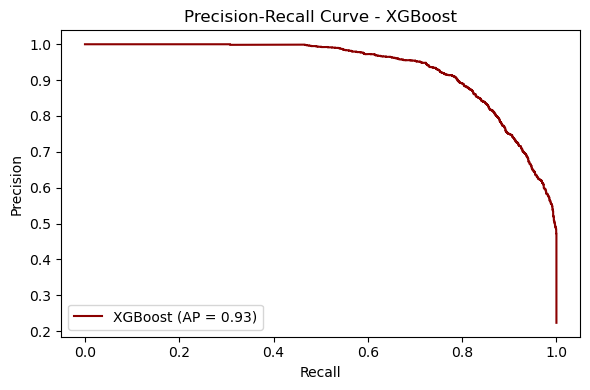

In [66]:
# Precision-Recall Curve for XGBoost
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)
ap_xgb = average_precision_score(y_test, y_proba_xgb)

plt.figure(figsize=(6, 4))
plt.plot(recall_xgb, precision_xgb, label='XGBoost (AP = {:.2f})'.format(ap_xgb), color='darkred')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

## Train and Evaluate `Gradient Boosting Classifier`

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

Gradient Boosting Accuracy: 0.8981111111111111
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      6990
           1       0.73      0.85      0.79      2010

    accuracy                           0.90      9000
   macro avg       0.84      0.88      0.86      9000
weighted avg       0.91      0.90      0.90      9000

ROC-AUC Score: 0.9652384714481955


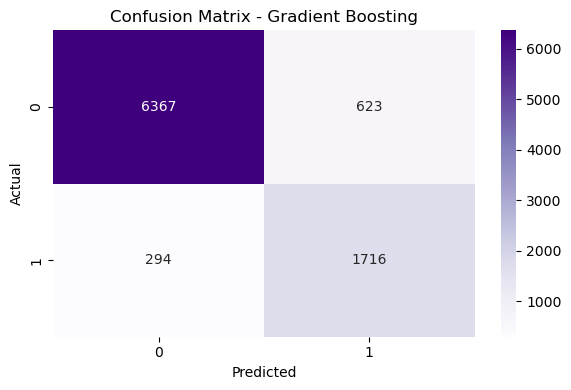

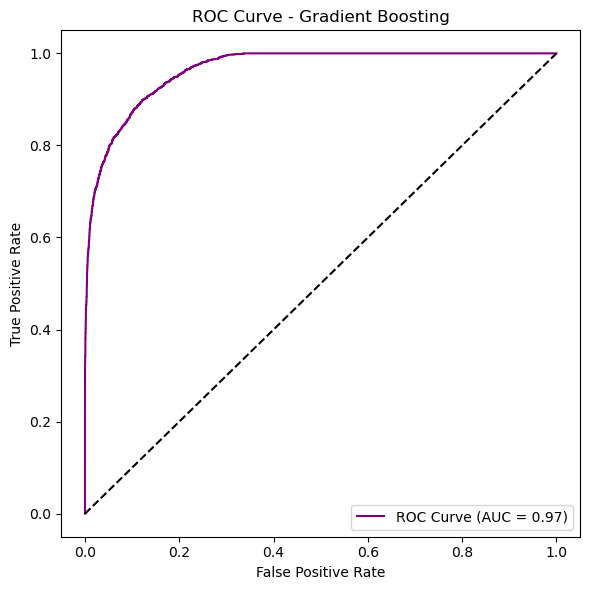

In [68]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_res, y_train_res)

# Predictions
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(6, 6))
plt.plot(fpr_gb, tpr_gb, label=f'ROC Curve (AUC = {roc_auc_gb:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

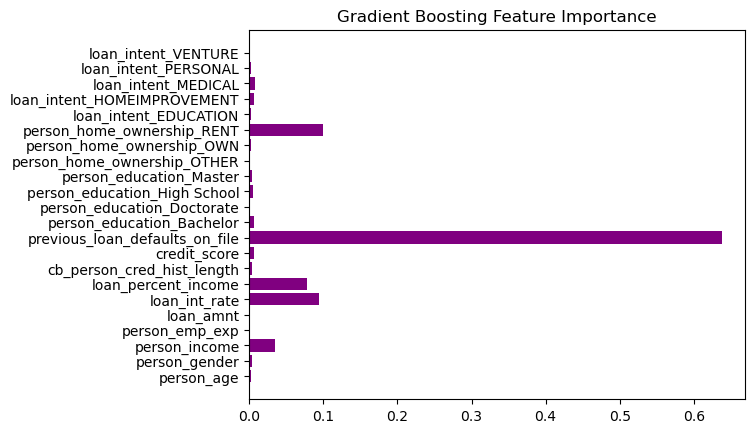

In [69]:
# Feature Importance Plot
importances = gb_model.feature_importances_
plt.barh(X.columns, importances, color='purple')
plt.title('Gradient Boosting Feature Importance')
plt.show()

In [70]:
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Gradient Boosting Feature Importance")
print(importance)

Gradient Boosting Feature Importance
                           feature  importance
9   previous_loan_defaults_on_file    0.637351
16      person_home_ownership_RENT    0.100206
5                    loan_int_rate    0.093661
6              loan_percent_income    0.078155
2                    person_income    0.034748
19             loan_intent_MEDICAL    0.007428
10       person_education_Bachelor    0.007032
8                     credit_score    0.006629
18     loan_intent_HOMEIMPROVEMENT    0.006422
12    person_education_High School    0.004970
7       cb_person_cred_hist_length    0.004402
13         person_education_Master    0.004065
1                    person_gender    0.003828
15       person_home_ownership_OWN    0.002855
0                       person_age    0.002850
17           loan_intent_EDUCATION    0.002801
20            loan_intent_PERSONAL    0.001941
4                        loan_amnt    0.000317
21             loan_intent_VENTURE    0.000232
3                   per

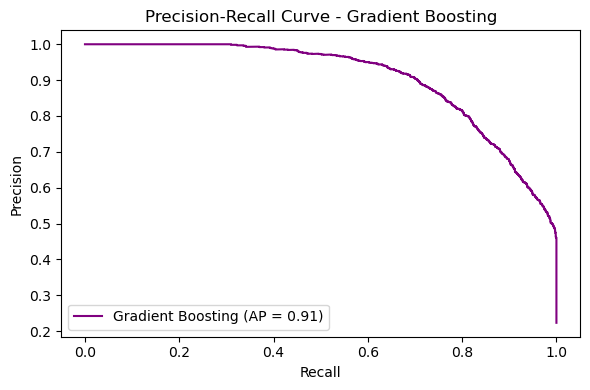

In [71]:
#  Precision-Recall Curve for Gradient Boosting

precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_proba_gb)
ap_gb = average_precision_score(y_test, y_proba_gb)

plt.figure(figsize=(6, 4))
plt.plot(recall_gb, precision_gb, label='Gradient Boosting (AP = {:.2f})'.format(ap_gb), color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Gradient Boosting")
plt.legend()
plt.tight_layout()
plt.show()

## Model Comparison 

In [72]:
# Define models and their results
model_names = ["Logistic Regression", "Random Forest", "XGBoost", "Gradient Boosting"]
y_preds = [y_pred, y_pred_rf, y_pred_xgb, y_pred_gb]
y_probas = [y_proba, y_proba_rf, y_proba_xgb, y_proba_gb]

# Collect metrics
results = []
for name, y_p, y_pr in zip(model_names, y_preds, y_probas):
    results.append([
        name,
        accuracy_score(y_test, y_p),
        precision_score(y_test, y_p),
        recall_score(y_test, y_p),
        f1_score(y_test, y_p),
        roc_auc_score(y_test, y_pr),
        average_precision_score(y_test, y_pr)
    ])

# Create DataFrame
df_results = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "Precision(1)", "Recall(1)", "F1-Score(1)", "ROC-AUC", "Average Precision"
])

print(df_results)

                 Model  Accuracy  Precision(1)  Recall(1)  F1-Score(1)  \
0  Logistic Regression  0.871333      0.670264   0.834328     0.743351   
1        Random Forest  0.914444      0.792729   0.835323     0.813469   
2              XGBoost  0.931667      0.860465   0.828358     0.844106   
3    Gradient Boosting  0.898111      0.733647   0.853731     0.789147   

    ROC-AUC  Average Precision  
0  0.942813           0.815797  
1  0.969515           0.912923  
2  0.976547           0.934768  
3  0.965238           0.905294  


## RESULT

- XGBoost is the Best Model

#### WHY
- Highest Overall Accuracy: 93.17%
Correctly predicts the most loan defaults and non-defaults.

- Best Precision for Defaults (Class 1): 86%
When predicting default, it’s right 86% of the time — minimizes false positives.

- Strong Recall for Defaults: 82.83%
Identifies most actual defaulters — reduces false negatives, critical for risk management.

- Highest F1-Score: 0.84
Balances precision and recall effectively, ideal for imbalanced data.

- Best ROC-AUC Score: 0.9765
Excellent class separation between default and non-default cases.

- Best Average Precision Score: 0.9348
Shows superior performance on precision-recall curve for imbalanced datasets.

#### SUMMARY
- XGBoost offers the most accurate, dependable, and well-balanced predictions, making it 
the most suitable model for predicting loan defaults in this analysis.

### SAVEING FOR DEPLOYMENT

In [79]:
import joblib

# Save the best model
joblib.dump(xgb_model, "loan_default_model.pkl")
print("✅ Model saved as loan_default_model.pkl")

# Save the scaler (e.g., StandardScaler)
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as scaler.pkl")

# Save the list of feature columns (after all encoding, in correct order)
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")
print("✅ Feature columns saved as feature_columns.pkl")

✅ Model saved as loan_default_model.pkl
✅ Scaler saved as scaler.pkl
✅ Feature columns saved as feature_columns.pkl
